In [3]:
import pandas as pd
import math

In [4]:
# Read the data from CSV file
df = pd.read_csv('../data/GDP.csv')

# Convert GDP column to float
df['GDP'] = df['GDP'].astype(float)

# Convert observation_date column to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Calculate GDP growth rate in absolute value
df['GDP_growth'] = df['GDP'].pct_change().abs()

# Calculate log of GDP
df['log_GDP'] = df['GDP'].apply(lambda x: math.log(x))

# Calculate GDP trend
df['GDP_trend'] = df['GDP'].diff()

df.head()

,observation_date,GDP,GDP_growth,log_GDP,GDP_trend
0,1947-01-01,243.164,NaN,5.493736,NaN
1,1947-04-01,245.968,0.011531,5.505201,2.804
2,1947-07-01,249.585,0.014705,5.519800,3.617
3,1947-10-01,259.745,0.040708,5.559700,10.160
4,1948-01-01,265.742,0.023088,5.582526,5.997


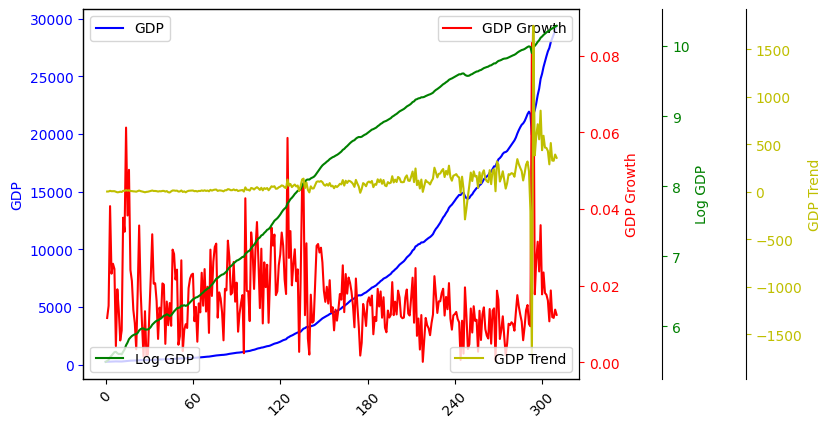

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it contains the columns 'GDP', 'GDP_growth', 'log_GDP', and 'GDP_trend'
# df = pd.read_csv('your_data.csv')

fig, ax1 = plt.subplots()

# Plot GDP on the first y-axis
ax1.plot(df.index, df['GDP'], 'b-', label='GDP')
ax1.set_ylabel('GDP', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for GDP_growth
ax2 = ax1.twinx()
ax2.plot(df.index, df['GDP_growth'], 'r-', label='GDP Growth')
ax2.set_ylabel('GDP Growth', color='r')
ax2.tick_params('y', colors='r')

# Create a third y-axis for log_GDP
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(df.index, df['log_GDP'], 'g-', label='Log GDP')
ax3.set_ylabel('Log GDP', color='g')
ax3.tick_params('y', colors='g')

# Create a fourth y-axis for GDP_trend
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(df.index, df['GDP_trend'], 'y-', label='GDP Trend')
ax4.set_ylabel('GDP Trend', color='y')
ax4.tick_params('y', colors='y')

# Set x-ticks every 60 observations and rotate them 45 degrees
ax1.set_xticks(df.index[::60])
ax1.set_xticklabels(df.index[::60], rotation=45)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower left')
ax4.legend(loc='lower right')

plt.show()

In [ ]:
v